##  Regresion

In [48]:
import warnings
warnings.simplefilter('ignore')

from sklearn.datasets import load_diabetes
import statsmodels.api as sm

from statsmodels.regression.linear_model import OLS

from sklearn.model_selection import train_test_split as tts

In [49]:
import pandas as pd

In [66]:
df = pd.DataFrame(load_diabetes().data, columns = load_diabetes().feature_names)

In [67]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [68]:
target = pd.Series(load_diabetes().target)

In [69]:
target

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Length: 442, dtype: float64

In [70]:
x_train,x_test, y_train, y_test = tts(df,target)

In [71]:
print(x_train.shape,x_test.shape,y_train.shape, y_test.shape)

(331, 10) (111, 10) (331,) (111,)


In [73]:
X = sm.add_constant(x_train)

In [79]:
modelo = OLS(y_train,X).fit()

In [80]:
y_pred = modelo.predict(x_test)

ValueError: shapes (111,10) and (11,) not aligned: 10 (dim 1) != 11 (dim 0)

In [83]:
df.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


In [81]:
modelo.summary() 
#el estadistico t y su probabilidad nos diran si la o las variables son estadisticamente significativas para el modelo
#COmparando con los alphas 'predeterminados' si es por debajo, son estadistiicamente significativas

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                     30.85
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           2.16e-41
Time:                        10:26:24   Log-Likelihood:                -1792.1
No. Observations:                 331   AIC:                             3606.
Df Residuals:                     320   BIC:                             3648.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        153.0759      3.045     50.273      0.000     147.085     159.066
age          -36.2382     68.924     -0.526      0.599    -171.840      99.364
sex         -306.7840     72.140     -4.253      0.000    -448.713    -164.855
bmi          483.6704     79.037      6.120      0.000     328.173     639.168
bp           329.5687     79.123      4.165      0.000     173.902     485.236
s1         -1053.6885    511.052     -2.062      0.040   -2059.134     -48.243
s2           761.9460    417.099      1.827      0.069     -58.657    1582.549
s3           145.0100    250.462      0.579      0.563    -347.751     637.771
s4           140.0116    185.916      0.753      0.452    -225.760     505.783
s5           782.2012    199.030      3.930      0.000     390.628    1173.774
s6            81.5969     81.516      1.001      0.318     -78.779     241.973
==============================================================================
Omnibus:                        1.892   Durbin-Watson:                   1.862
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.663
Skew:                          -0.048   Prob(JB):                        0.435
Kurtosis:                       2.666   Cond. No.                         235.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
#Seleeccionando variables que sean estadisticamente significativas para el modelo, previo se puede hacer una matrix de correlaciones para observarlas
df_2  = df[['sex','bmi','bp','s1','s2','s5']]

In [89]:
x_train,x_test, y_train, y_test = tts(df_2,target)

In [90]:
X = sm.add_constant(x_train)

In [91]:
modelo = OLS(y_train,X).fit()

In [93]:
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.513
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     56.99
Date:                Thu, 10 Sep 2020   Prob (F-statistic):           7.27e-48
Time:                        10:34:24   Log-Likelihood:                -1784.3
No. Observations:                 331   AIC:                             3583.
Df Residuals:                     324   BIC:                             3609.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7790      2.952     51.755      0.000     146.972     158.586
sex         -181.3606     68.330     -2.654      0.008    -315.786     -46.935
bmi          532.5811     77.890      6.838      0.000     379.347     685.816
bp           356.4286     72.421      4.922      0.000     213.954     498.903
s1          -823.2368    187.645     -4.387      0.000   -1192.394    -454.079
s2           518.9447    171.119      3.033      0.003     182.301     855.588
s5           752.6327     92.309      8.153      0.000     571.031     934.234
==============================================================================
Omnibus:                        1.139   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.566   Jarque-Bera (JB):                1.138
Skew:                          -0.038   Prob(JB):                        0.566
Kurtosis:                       2.723   Cond. No.                         87.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
sm.add_constant(y_test)

In [97]:
y_pred = modelo.predict(sm.add_constant(x_test))

In [94]:
from sklearn.metrics import mean_squared_error as mse

###### MSE


$$MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}$$


pertenece al intervalo [0, +$\infty$)

In [105]:
m = mse(y_test,y_pred) #Es la media de los errores entre nuestra prediccion y nuestros valores reales
#Dicho error seria la variacion o distancia de los puntos a nuestra linea de regresion

In [106]:
m/len(y_pred)

28.630052243730294

In [100]:
y_pred

285    190.456279
256    264.559414
378    170.277952
52     130.706627
202    163.803898
          ...    
62      65.451524
165     74.696933
390    252.875599
163    201.669133
402    143.579352
Length: 111, dtype: float64

In [101]:
y_test #Datos que representan la 'verdad' y comparamos con nuestros valores  predichos

285    233.0
256    346.0
378    245.0
52      59.0
202    196.0
       ...  
62      52.0
165     59.0
390    277.0
163    131.0
402    168.0
Length: 111, dtype: float64

###### MAE


$$MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i-\hat{y}_i|$$


pertenece al intervalo [0, +$\infty$)

In [104]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred)

46.34835443713739

###### RMSE


$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}$$


pertenece al intervalo [0, +$\infty$)

In [109]:
rmse = math.sqrt(m)

In [110]:
rmse

56.37318333262778

###### R2


$$R2 = 1 - \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^{2}}{\sum_{i=1}^{n}(y_i-\bar{y})^{2}}$$

###### Adjusted R2

$$AdjustedR2 = 1-(1-R^{2})\frac{n-1}{n-p-1}$$


donde:
+ n = tamaño de la muestra
+ p = nº de variables del modelo


pertenecen al intervalo (-$\infty$, 1]

In [111]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred)

0.4965043660400611

# Clasificacion

In [112]:
from sklearn.datasets import load_wine
from sklearn.svm import SVC

data=load_wine()

X_train, X_test, y_train, y_test=tts(data.data, data.target)

In [135]:
X_train

array([[1.373e+01, 1.500e+00, 2.700e+00, ..., 1.190e+00, 2.710e+00,
        1.285e+03],
       [1.237e+01, 1.070e+00, 2.100e+00, ..., 1.040e+00, 2.770e+00,
        6.600e+02],
       [1.270e+01, 3.870e+00, 2.400e+00, ..., 1.190e+00, 3.130e+00,
        4.630e+02],
       ...,
       [1.372e+01, 1.430e+00, 2.500e+00, ..., 8.900e-01, 2.870e+00,
        1.285e+03],
       [1.184e+01, 8.900e-01, 2.580e+00, ..., 7.900e-01, 3.080e+00,
        5.200e+02],
       [1.260e+01, 1.340e+00, 1.900e+00, ..., 1.040e+00, 2.770e+00,
        5.620e+02]])

In [113]:
y_train

array([0, 1, 1, 1, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 0, 2, 0, 1, 2, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 1, 1, 0, 0,
       2, 1, 0, 1, 0, 0, 2, 1, 2, 0, 2, 2, 2, 1, 2, 2, 0, 1, 1, 1, 0, 1,
       0, 2, 0, 1, 1, 0, 2, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 1, 2, 0,
       1, 1, 0, 2, 2, 0, 2, 0, 2, 2, 0, 1, 1, 2, 1, 1, 0, 0, 1, 0, 2, 1,
       0, 0, 0, 1, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 0, 0, 1,
       1])

In [128]:
svc=SVC(kernel = 'linear').fit(X_train, y_train)

y_pred=svc.predict(X_test)

In [129]:
y_test #la verdad

array([1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 1,
       2])

In [130]:
y_pred #la prediccion

array([1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 0, 0, 2, 1, 2, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2, 1, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1,
       2])

In [119]:
from sklearn.metrics import confusion_matrix

In [131]:
confusion_matrix(y_test, y_pred) #checa valores uno a uno de la prediccion con la verdad de manera ordenada 

array([[ 9,  1,  0],
       [ 1, 21,  0],
       [ 1,  0, 12]], dtype=int64)

In [132]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns = ['0','1','2'])

,0,1,2
0,9,1,0
1,1,21,0
2,1,0,12


In [121]:
#Columnas seran nuestras prediccion
#Filas seran nuestra verdad

In [ ]:
#Accuracy

In [133]:
from sklearn.metrics import accuracy_score as acc

acc(y_test, y_pred) 

0.9333333333333333

In [ ]:
#Precision 

In [136]:
from sklearn.metrics import precision_score as prec

prec(y_test, y_pred, average='macro')

0.9242424242424243

In [ ]:
#Recall score,verdaderos positivos como una proporcion de falsos postivos

In [137]:
from sklearn.metrics import recall_score as rec

rec(y_test, y_pred, average='macro')

0.925874125874126

In [ ]:
# Se basa en las medidas de recall y precision

In [138]:
from sklearn.metrics import f1_score as f1

f1(y_test, y_pred, average='macro')

0.9238961038961039

##### ROC-AUC  (Característica operativa del receptor y área debajo de la curva)

+ TPR := TP/(TP+FN)
+ FPR := FP/(TN+FP)


![](data/roc.png)

In [145]:
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC

data=load_breast_cancer()

X_train, X_test, y_train, y_test=tts(data.data, data.target)


svc=SVC(probability=True).fit(X_train, y_train)

y_pred=svc.predict(X_test) # predice etiqueta

y_prob=svc.predict_proba(X_test)[::, 1]  # devuelve la prob

In [140]:
from sklearn.metrics import roc_curve as roc
from sklearn.metrics import roc_auc_score as auc

In [142]:
import matplotlib.pyplot as plt

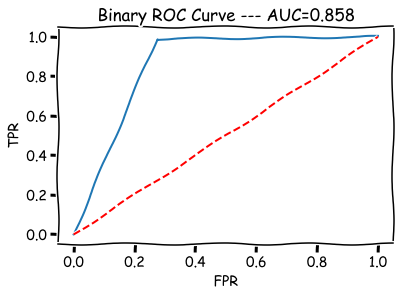

In [143]:
with plt.xkcd():  # mal pintao, y_pred
    fpr, tpr, umbrales=roc(y_test, y_pred)
    a=auc(y_test, y_pred)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Binary ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();

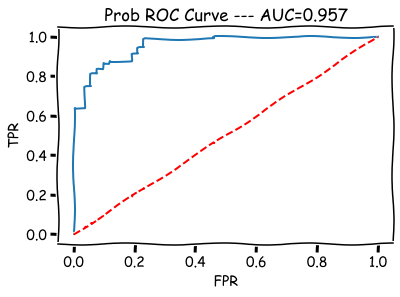

In [146]:
with plt.xkcd(): # bien pintá, y_prob
    fpr, tpr, umbrales=roc(y_test, y_prob)
    a=auc(y_test, y_prob)
    plt.plot(fpr, tpr)
    plt.plot(fpr, fpr, 'r--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Prob ROC Curve --- AUC={:.3f}'.format(a))
    plt.show();